In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import sqlite3
import numpy as np

# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Replace -1 with NaN in the 'year_built' column
property_with_crime_df['year_built'].replace(-1, pd.NA, inplace=True)

# Select features and target variable
X = property_with_crime_df[['latitude', 'longitude', 'sold_price', 'year_built', 'neighborhood']]
y = property_with_crime_df['crime_count']

# One-hot encode the 'neighborhood' column
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in latitude and longitude columns
imputer = SimpleImputer(strategy='mean')
X_train[['latitude', 'longitude']] = imputer.fit_transform(X_train[['latitude', 'longitude']])
X_test[['latitude', 'longitude']] = imputer.transform(X_test[['latitude', 'longitude']])
# Impute missing values in the 'year_built' column
imputer = SimpleImputer(strategy='mean')
X_train[:, 3:4] = imputer.fit_transform(X_train[:, 3:4])
X_test[:, 3:4] = imputer.transform(X_test[:, 3:4])

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter based on your needs

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the performance
final_mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Final Mean Squared Error: {final_mse}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

r2 = r2_score(y_test, y_pred_ridge)
print(f'R-squared Score: {r2}')

def mean_absolute_percentage_error(y_true, y_pred_ridge): 
    y_true, y_pred = np.array(y_true), np.array(y_pred_ridge)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming y_test and y_pred_final are defined
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Evaluate training set performance
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
final_mse_train = mean_squared_error(y_train, y_pred_train_ridge)
print(f'Final Mean Squared Error (Training): {final_mse_train}')

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

r2_train = r2_score(y_train, y_pred_train_ridge)
print(f'R-squared Score (Training): {r2_train}')

# Calculate MAPE for training set
mape_train = mean_absolute_percentage_error(y_train, y_pred_train_ridge)
print(f'Mean Absolute Percentage Error (MAPE) (Training): {mape_train:.2f}%')



Final Mean Squared Error: 0.0007611835291981626
Root Mean Squared Error (RMSE): 0.03
R-squared Score: 0.9999999999299973
Mean Absolute Percentage Error (MAPE): 0.00%
Final Mean Squared Error (Training): 0.0007530614252032837
Root Mean Squared Error (RMSE) (Training): 0.03
R-squared Score (Training): 0.999999999931001
Mean Absolute Percentage Error (MAPE) (Training): 0.00%
Model has been saved as 'ridge_modellatandlong.sav'


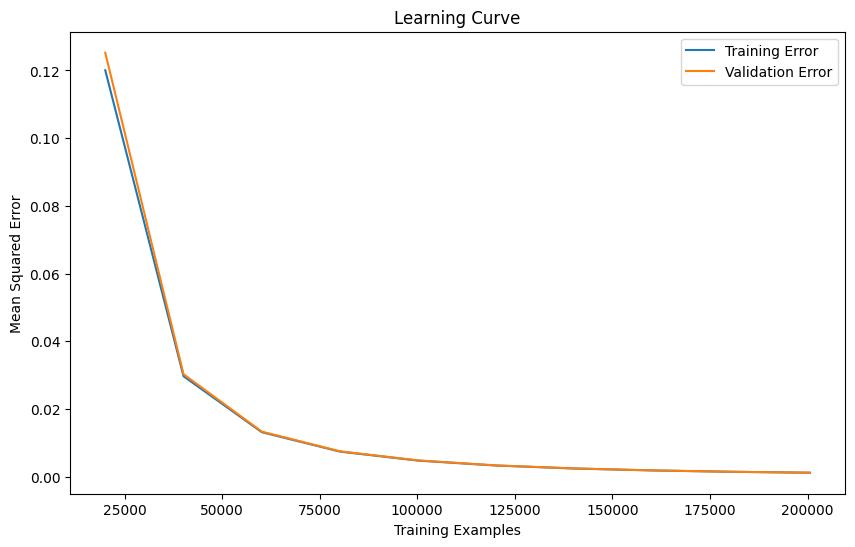

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error')

    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Plot learning curve
plot_learning_curve(ridge_model, X_train_scaled, y_train)


In [10]:
#dummy prediction set
# Calculate the mean of y_train
y_train_mean = np.mean(y_train)

# Create a "prediction" set with the mean values
y_pred_mean = np.full_like(y_test, fill_value=y_train_mean)

# Evaluate the performance for the mean prediction
mse_mean = mean_squared_error(y_test, y_pred_mean)
print(f'Mean Squared Error (Mean Prediction): {mse_mean}')

rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))
print(f'Root Mean Squared Error (RMSE) (Mean Prediction): {rmse_mean:.2f}')

r2_mean = r2_score(y_test, y_pred_mean)
print(f'R-squared Score (Mean Prediction): {r2_mean}')

mape_mean = mean_absolute_percentage_error(y_test, y_pred_mean)
print(f'Mean Absolute Percentage Error (MAPE) (Mean Prediction): {mape_mean:.2f}%')


Mean Squared Error (Mean Prediction): 10873639.377528556
Root Mean Squared Error (RMSE) (Mean Prediction): 3297.52
R-squared Score (Mean Prediction): -8.73112076638094e-07
Mean Absolute Percentage Error (MAPE) (Mean Prediction): 110.99%


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import sqlite3
import numpy as np

# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Replace -1 with NaN in the 'year_built' column
property_with_crime_df['year_built'].replace(-1, pd.NA, inplace=True)

# Select features and target variable
X = property_with_crime_df[['latitude', 'longitude', 'sold_price', 'year_built', 'neighborhood']]
y = property_with_crime_df['crime_count']

# One-hot encode the 'neighborhood' column
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in latitude and longitude columns
imputer = SimpleImputer(strategy='mean')
X_train[['latitude', 'longitude']] = imputer.fit_transform(X_train[['latitude', 'longitude']])
X_test[['latitude', 'longitude']] = imputer.transform(X_test[['latitude', 'longitude']])

for column in X_train.columns:
    if 'year_built' in column:
        imputer = SimpleImputer(strategy='mean')
        X_train[column] = imputer.fit_transform(X_train[[column]])
        X_test[column] = imputer.transform(X_test[[column]])



# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter based on your needs

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the performance
final_mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Final Mean Squared Error: {final_mse}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

r2 = r2_score(y_test, y_pred_ridge)
print(f'R-squared Score: {r2}')

def mean_absolute_percentage_error(y_true, y_pred_ridge): 
    y_true, y_pred = np.array(y_true), np.array(y_pred_ridge)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming y_test and y_pred_final are defined
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Evaluate training set performance
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
final_mse_train = mean_squared_error(y_train, y_pred_train_ridge)
print(f'Final Mean Squared Error (Training): {final_mse_train}')

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

r2_train = r2_score(y_train, y_pred_train_ridge)
print(f'R-squared Score (Training): {r2_train}')

# Calculate MAPE for training set
mape_train = mean_absolute_percentage_error(y_train, y_pred_train_ridge)
print(f'Mean Absolute Percentage Error (MAPE) (Training): {mape_train:.2f}%')

import joblib

# Save the Ridge model using Joblib with ".sav" extension
joblib.dump(ridge_model, 'ridge_modelfinaltest.sav')

print("Model has been saved as 'ridge_modelfinaltest.sav'")

Final Mean Squared Error: 0.0007611835291981626
Root Mean Squared Error (RMSE): 0.03
R-squared Score: 0.9999999999299973
Mean Absolute Percentage Error (MAPE): 0.00%
Final Mean Squared Error (Training): 0.0007530614252032837
Root Mean Squared Error (RMSE) (Training): 0.03
R-squared Score (Training): 0.999999999931001
Mean Absolute Percentage Error (MAPE) (Training): 0.00%
Model has been saved as 'ridge_modelfinaltest.sav'


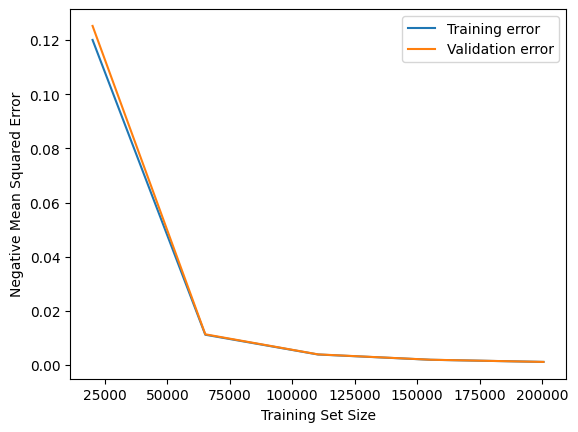

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean scores and standard deviations
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()

In [2]:
#dummy prediction set
# Calculate the mean of y_train
y_train_mean = np.mean(y_train)

# Create a "prediction" set with the mean values
y_pred_mean = np.full_like(y_test, fill_value=y_train_mean)

# Evaluate the performance for the mean prediction
mse_mean = mean_squared_error(y_test, y_pred_mean)
print(f'Mean Squared Error (Mean Prediction): {mse_mean}')

rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))
print(f'Root Mean Squared Error (RMSE) (Mean Prediction): {rmse_mean:.2f}')

r2_mean = r2_score(y_test, y_pred_mean)
print(f'R-squared Score (Mean Prediction): {r2_mean}')

mape_mean = mean_absolute_percentage_error(y_test, y_pred_mean)
print(f'Mean Absolute Percentage Error (MAPE) (Mean Prediction): {mape_mean:.2f}%')

Mean Squared Error (Mean Prediction): 10873639.377528556
Root Mean Squared Error (RMSE) (Mean Prediction): 3297.52
R-squared Score (Mean Prediction): -8.73112076638094e-07
Mean Absolute Percentage Error (MAPE) (Mean Prediction): 110.99%
